# Importando pacotes e criando funções

In [0]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def bcb(codigo, nome = "Valor", media_movel=1):
  """
  codigo (int, default = None): codigo da série no site https://dadosabertos.bcb.gov.br/ 
  nome (str, default = "Valor"): Nome a ser dado a série
  media_movel (int, default = 1): Número de perídos móveis
    - 1: para série original
    - 4: trimestre móvel
    - 12: mês móvel
  
  ===================
  Exemplo
  
  bcb(11427, "Variação Mensal")
  """
  import matplotlib.pyplot as plt
  import seaborn as sns
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.'+ str(codigo) +'/dados?formato=csv'

  df = pd.read_csv(
    url, 
    sep = ';', 
    index_col = 'data', 
    parse_dates=True, 
    decimal= ',', 
    date_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
  )
  df.index.name = ''
  df.columns = [nome]
  
  #fig, ax = plt.subplots(2,2,constrained_layout=True)
  
  #df.plot(ax = ax[0,0], title = "Série original",color = 'darkred')
  #df.pct_change().plot(ax = ax[1,0], title = "Taxa de crescimento",color = 'darkred')
  #df.rolling(media_movel).mean().plot(ax = ax[0,1], title = "Nível móvel\n" + str(media_movel) + " períodos",color = 'darkred')
  #df.pct_change().rolling(media_movel).mean().plot(ax = ax[1,1], title = "Crescimento móvel\n" + str(media_movel) + " períodos",color = 'darkred')
  
  #fig.suptitle("Gráfico da série " + nome)
  #sns.despine()
  #plt.show()
  return df

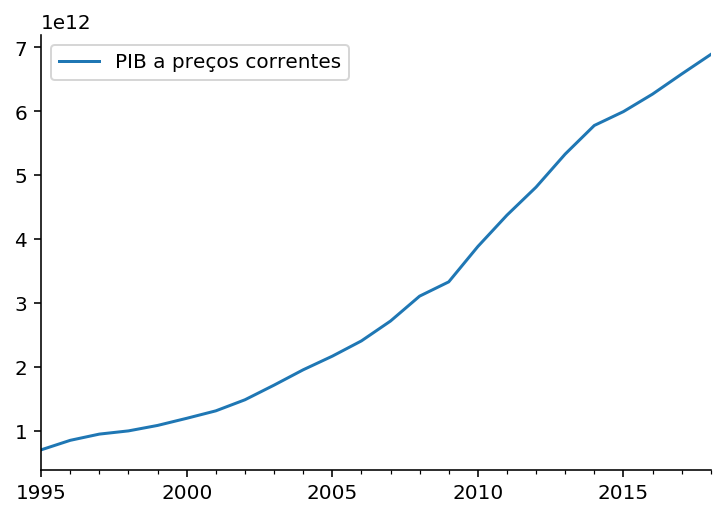

In [7]:
df = bcb(codigo=1207, nome="PIB a preços correntes")
df["1994-10-01":].plot()
sns.despine()
plt.show()